## Assigments 1.1

This first part of the assignments is based on the iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [161]:
import numpy as np
import matplotlib.pyplot as plt

# importing the data from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# extracting the relevant information
data = iris_dataset.data
data_feature_names = iris_dataset.feature_names
target = iris_dataset.target
target_names = iris_dataset.target_names

print('There are ' + str(len(data_feature_names)) + ' features, whose names are: \n' + str(data_feature_names))
print('\nThere are ' + str(len(target_names)) + ' classes to predict, whose names are: \n' + str(target_names))
print('\nThere are ' + str(data.shape[0]) + ' observations')

There are 4 features, whose names are: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

There are 3 classes to predict, whose names are: 
['setosa' 'versicolor' 'virginica']

There are 150 observations


$\mathbf{Exercise\, 1.}$ Compute the median, mean and standard deviation for each of the 4 features in the iris dataset (don't use numpy or other pre-defined functions, write your own routine).

In [162]:
def retrieve_feature(dataset, elem):
    """
    Isolates the elements of each features
    """
    return [x[elem] for x in dataset]

def compute(dataset, dataset_names):
    """
    Computes the basic statistics of each feature
    """
    length = len(dataset)
    results = {}
    # Functions
    median = lambda lst: (lst[int(length/2)] + lst[int(length/2)+1])/2
    mean = lambda lst: sum(lst)/length
    std_deviation = lambda lst: mean((lst-mean(lst))**2)**(1/2)
    # IO
    for idx, name in enumerate(dataset_names):
        # Retrieve and sort feature
        feature = retrieve_feature(data, idx)
        sorted_feature = sorted(feature)
        # Records mean and std_dev
        mn = mean(feature)
        std_dev = std_deviation(feature)
        results[name] = [mn, std_dev]
        # Prints results
        print(f"Statistics on {dataset_names[idx]}:")
        print(f"Median: {round(median(sorted_feature),2)}")
        print(f"Mean: {round(mn,2)}")
        print(f"Standard Deviation: {round(std_dev,2)}\n")
    return results

In [163]:
results = compute(data, data_feature_names)

Statistics on sepal length (cm):
Median: 5.8
Mean: 5.84
Standard Deviation: 0.83

Statistics on sepal width (cm):
Median: 3.0
Mean: 3.06
Standard Deviation: 0.43

Statistics on petal length (cm):
Median: 4.4
Mean: 3.76
Standard Deviation: 1.76

Statistics on petal width (cm):
Median: 1.3
Mean: 1.2
Standard Deviation: 0.76



$\mathbf{Exercise\, 2.}$ For each feature, generate 150 Gaussian distributed samples with the same mean and standard_deviation computed in Exercise 1.

In [164]:
import random as rd

for k, v in results.items():
    # Clears old samples from results
    if len(results[k]) > 2: results[k] = results[k][:2]
    # Draws 150 samples
    print(f"Drawing samples for {k}")
    samples = []
    for _ in range(150): samples.append(rd.gauss(v[0], v[1]))
    results[k].append(samples)

Drawing samples for sepal length (cm)
Drawing samples for sepal width (cm)
Drawing samples for petal length (cm)
Drawing samples for petal width (cm)


$\mathbf{Exercise\, 3.}$ Compute the histogram (with 30 bins) of the distribution of the generate samples and plot it together with the histogram of the original data. The histograms must be plotted on the same plot. Comment on the difference between simulations and real data: for which feature the distributions are most different? What is the reason? 

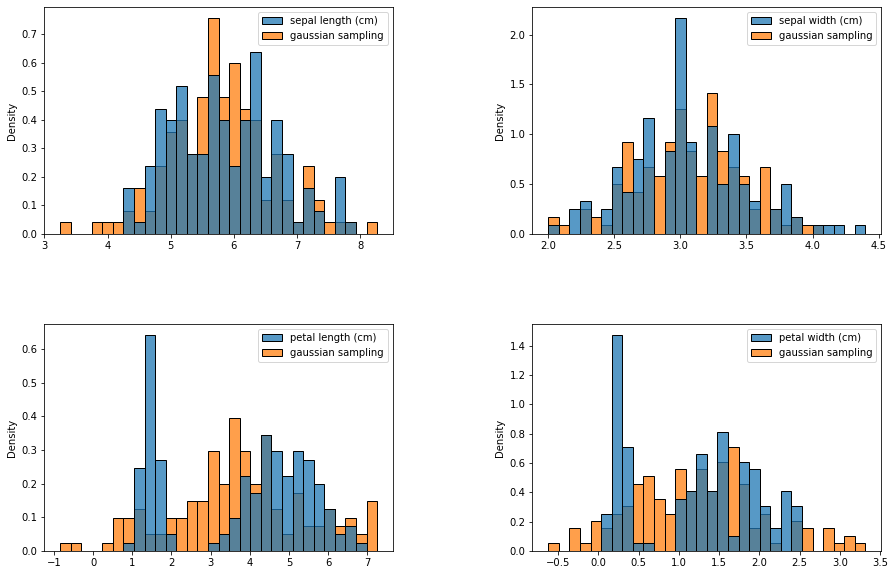

In [169]:
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(4):
    # Creates the dataframe to plot
    feature_data = retrieve_feature(data, i)
    gaussian_data = results[data_feature_names[i]][2]
    df = pd.DataFrame(list(zip(feature_data, 
                               gaussian_data)), 
                      columns=[data_feature_names[i], "gaussian sampling"])
    # Sets the plot
    ax = fig.add_subplot(2, 2, i+1)
    sns.histplot(ax=ax, data=df, stat="density", bins=30, common_norm=False)

plt.show()

**<u>Comment</u>**

1. It seems that the Sepal Length and Sepal Width are gaussian distributed, as per the visual comparison with the gaussian sampling.
2. On the contrary, Petal Length and Petal Width have two clearly distinct distributions (for instance petal length concentrates around 1.5 and 5). 

As such, there seems to be a different distribution when data relates to **petals** or **sepal**. It is likely that one or a few species have a different petal characteristic, creating the split in the distribution.

$\mathbf{Exercise\, 4.}$ Estimate and plot the probability density function of the feature $\mbox{petal length (cm)}$.


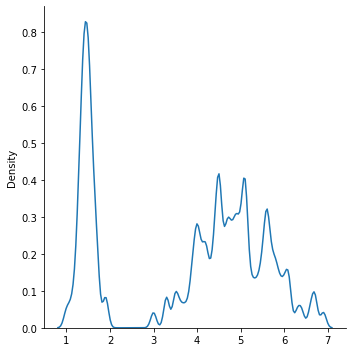

In [177]:
sns.displot(retrieve_feature(data, 2), kind="kde", bw_adjust=.1)

## Assigment 1.2

$\mathbf{Exercise\, 1.}$ Create a linear benchmark, where the dimension of the input data $X$ is 2, and the dimension of the output data $y$ is 1. Choose the amount of noise and sample size.

Evaluate the prediction metrics for the following regression methods:

- Linear regression
- Support Vector Regression with RBF kernel
- Decision Tree Regression


In [2]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

We are interested in predicting TDP (The watt-consumption) of Graphics Cards based on memory size, and memory clock.

**Original Source**: https://www.kaggle.com/iliassekkaf/computerparts

In [185]:
df = pd.read_csv("All_GPUs.csv")

remove_unit = lambda string: string.split(" ")[0]
df["Max_Power"]=df["Max_Power"].map(remove_unit)
df["Memory"]=df["Memory"].map(remove_unit)
df["Memory_Speed"]=df["Memory_Speed"].map(remove_unit)

df.rename(columns = {"Architecture":"Name",
                     "Max_Power":"max_power_watts", 
                     "Memory":"memory_mb", 
                     "Memory_Speed":"memory_speed_mhz"}, 
          inplace = True)
df

,Name,max_power_watts,memory_mb,memory_speed_mhz
0,R600 XT,215,512,828
1,R600 PRO,200,512,800
2,RV630,45,256,700
3,RV630,50,256,1100
4,R700 RV790 XT,190,2048,1050
...,...,...,...,...
2239,Kepler GK208,19,2048,900
2240,Fermi GF119-300-A1,30,1024,898
2241,Kepler GK208,19,1024,900
2242,Kepler GK208,25,2048,900


In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [239]:
X = df[["memory_mb", "memory_speed_mhz"]]
y = df["max_power_watts"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [240]:
def print_results(y_true, preds):
    """
    Prints the result of a regression model
    """
    mse = mean_squared_error(y_true, preds)
    r = r2_score(y_true, preds)
    print(f"Mean Squared Error: {mse}",
          f"R2 score: {r}",
          sep="\n")
    return mse, r

In [241]:
# Linear Regression
linear_regression_model = LinearRegression()
# Fits the model
lrm = linear_regression_model.fit(X_train, y_train)
# Predicts on train data
preds = lrm.predict(X_train)
# Accuracy
lrm_train_results = print_results(y_train, preds)

Mean Squared Error: 7600.6099390653235
R2 score: 0.3011529580291684


In [260]:
# Linear SVR
linear_svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Fits the model
lsvr = linear_svr.fit(X_train, y_train)
# Predicts on train data
preds = lsvr.predict(X_train)
# Accuracy
svr_train_results = print_results(y_train, preds)

Mean Squared Error: 3024.7294428298474
R2 score: 0.7218876852212646


In [261]:
# Decision Tree
tree = DecisionTreeRegressor(max_depth=3)
# Fits the model
ctree = tree.fit(X_train, y_train)
# Predicts on train data
preds = ctree.predict(X_train)
# Accuracy
tree_train_results = print_results(y_train, preds)

Mean Squared Error: 5814.855079041651
R2 score: 0.46534629404004746


$\mathbf{Exercise\, 2.}$ Create a testing dataset and assess the testing metrics for the models.

In [262]:
preds = lrm.predict(X_test)
lrm_test_results = print_results(y_test, preds)

Mean Squared Error: 7911.125541552783
R2 score: 0.2690339678135597


In [263]:
preds = lsvr.predict(X_test)
svr_test_results = print_results(y_test, preds)

Mean Squared Error: 5587.534839203713
R2 score: 0.4837272964935684


In [264]:
preds = ctree.predict(X_test)
tree_test_results = print_results(y_test, preds)

Mean Squared Error: 6222.748389150808
R2 score: 0.4250353283586834


$\mathbf{Exercise\, 3.}$ Plot the regression results (training and testing) for each model

In [315]:
def plot_results(train_data, test_data, title):
    """
    Reshapes result data in plotable data
    """
    d = {"mse":[train_data[0], test_data[0]], "r2": [train_data[1], test_data[1]]}
    d = pd.DataFrame(data=d, index=["train", "test"])
    d.plot(kind="bar",rot=1, subplots=True, title = title)

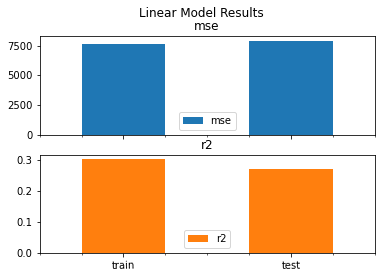

In [318]:
plot_results(lrm_train_results, lrm_test_results, "Linear Model Results")

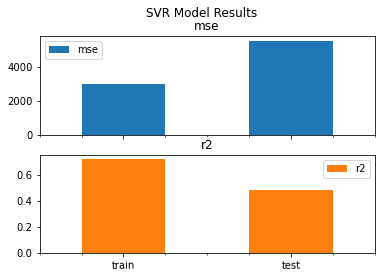

In [319]:
plot_results(svr_train_results, svr_test_results, "SVR Model Results")

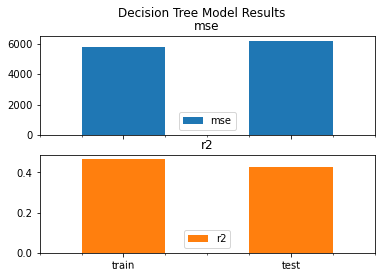

In [320]:
plot_results(tree_train_results, tree_test_results, "Decision Tree Model Results")

$\mathbf{Exercise\, 4.}$ Create a classification benchmark with 3 labels.

Evaluate training and testing prediction metrics for the following classification methods:

- K-nearest neighbours
- Random Forest
- Naive Bayes

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB